In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from scipy.stats import spearmanr

In [208]:
#reading dataset
df = pd.read_csv('./dataset/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [210]:
# Check for duplicate entries
df.duplicated().sum()

0

In [211]:
# Check for missing values in target column
df.Survived.isnull().sum()

0

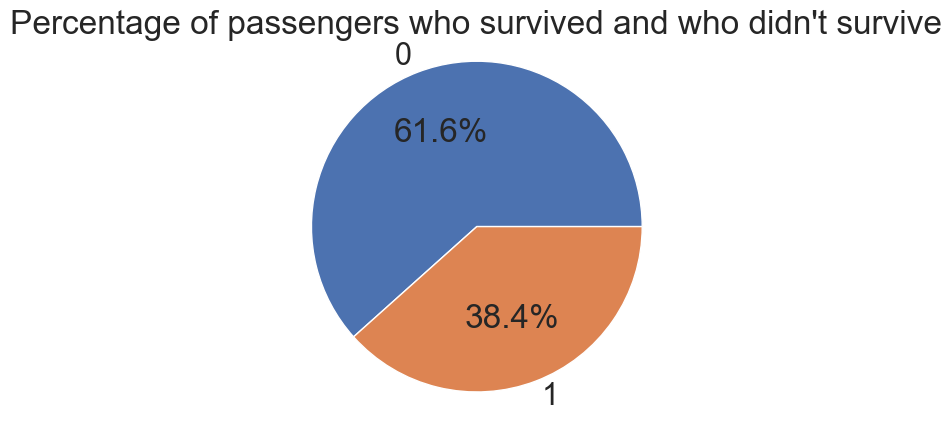

In [212]:
survived_counts = df['Survived'].value_counts()

plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%')
plt.title("Percentage of passengers who survived and who didn't survive")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [213]:
# Clearly the feature 'PassengerId','Name' is of no use to us and can be dropped
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

#### Let us handle the missing values in the dataset

In [214]:
#check for missing value in entire dataframe
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [215]:
# 'Cabin' Column has more than 50% null values, So let's drop it
df.drop(columns="Cabin",inplace=True)
 #drop null values from embarked column as its a very small % of total rows
df.dropna(subset=['Embarked'],inplace=True)
df.shape

(889, 8)

In [216]:
#Imputing missing values with the mean age of passengers in each Pclass and Sex group, and then use it to fill in the missing values in the 'Age' column
mean_age = df.groupby(['Pclass','Sex'])['Age'].transform('mean')
df['Age'] = df['Age'].fillna(mean_age)

In [217]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Let's start by checking the summary statistics of the numeric columns in the dataset:

In [218]:
df.describe().style.background_gradient(cmap = "Blues")

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.268362,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.245995,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.750000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [219]:
Y= df['Survived']
df.drop(columns=['Survived'],inplace=True)

### Let us create count plots to visualize the distribution of categorical variables.

In [220]:
df['Pclass'] = df['Pclass'].astype('object')

In [221]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.shape

(889, 3)

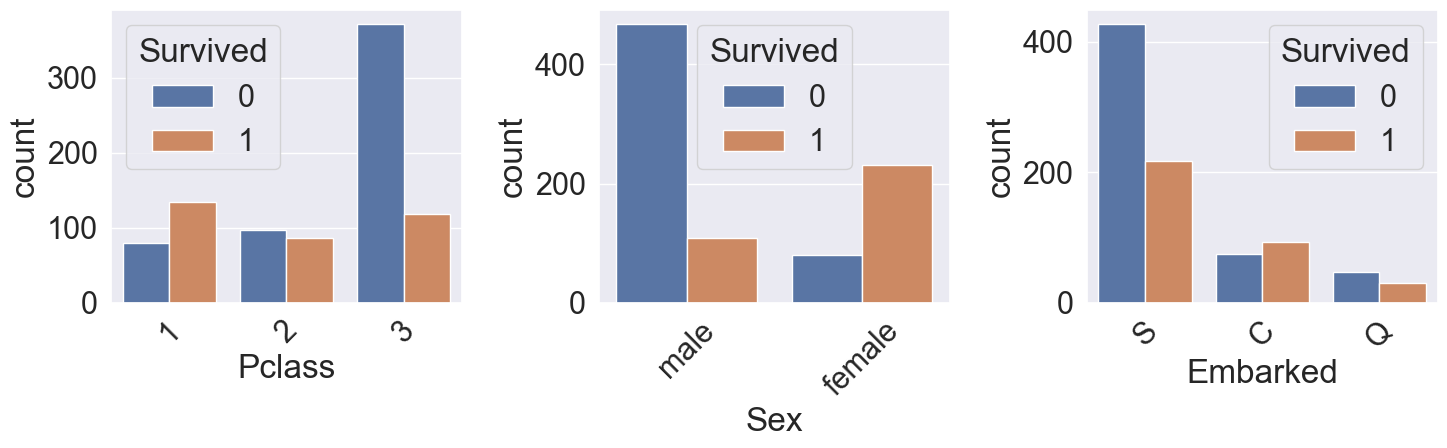

In [222]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_columns.columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, hue=Y)
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

### Let us explore the distribution of numeric features ###

In [223]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_columns.shape

(889, 4)

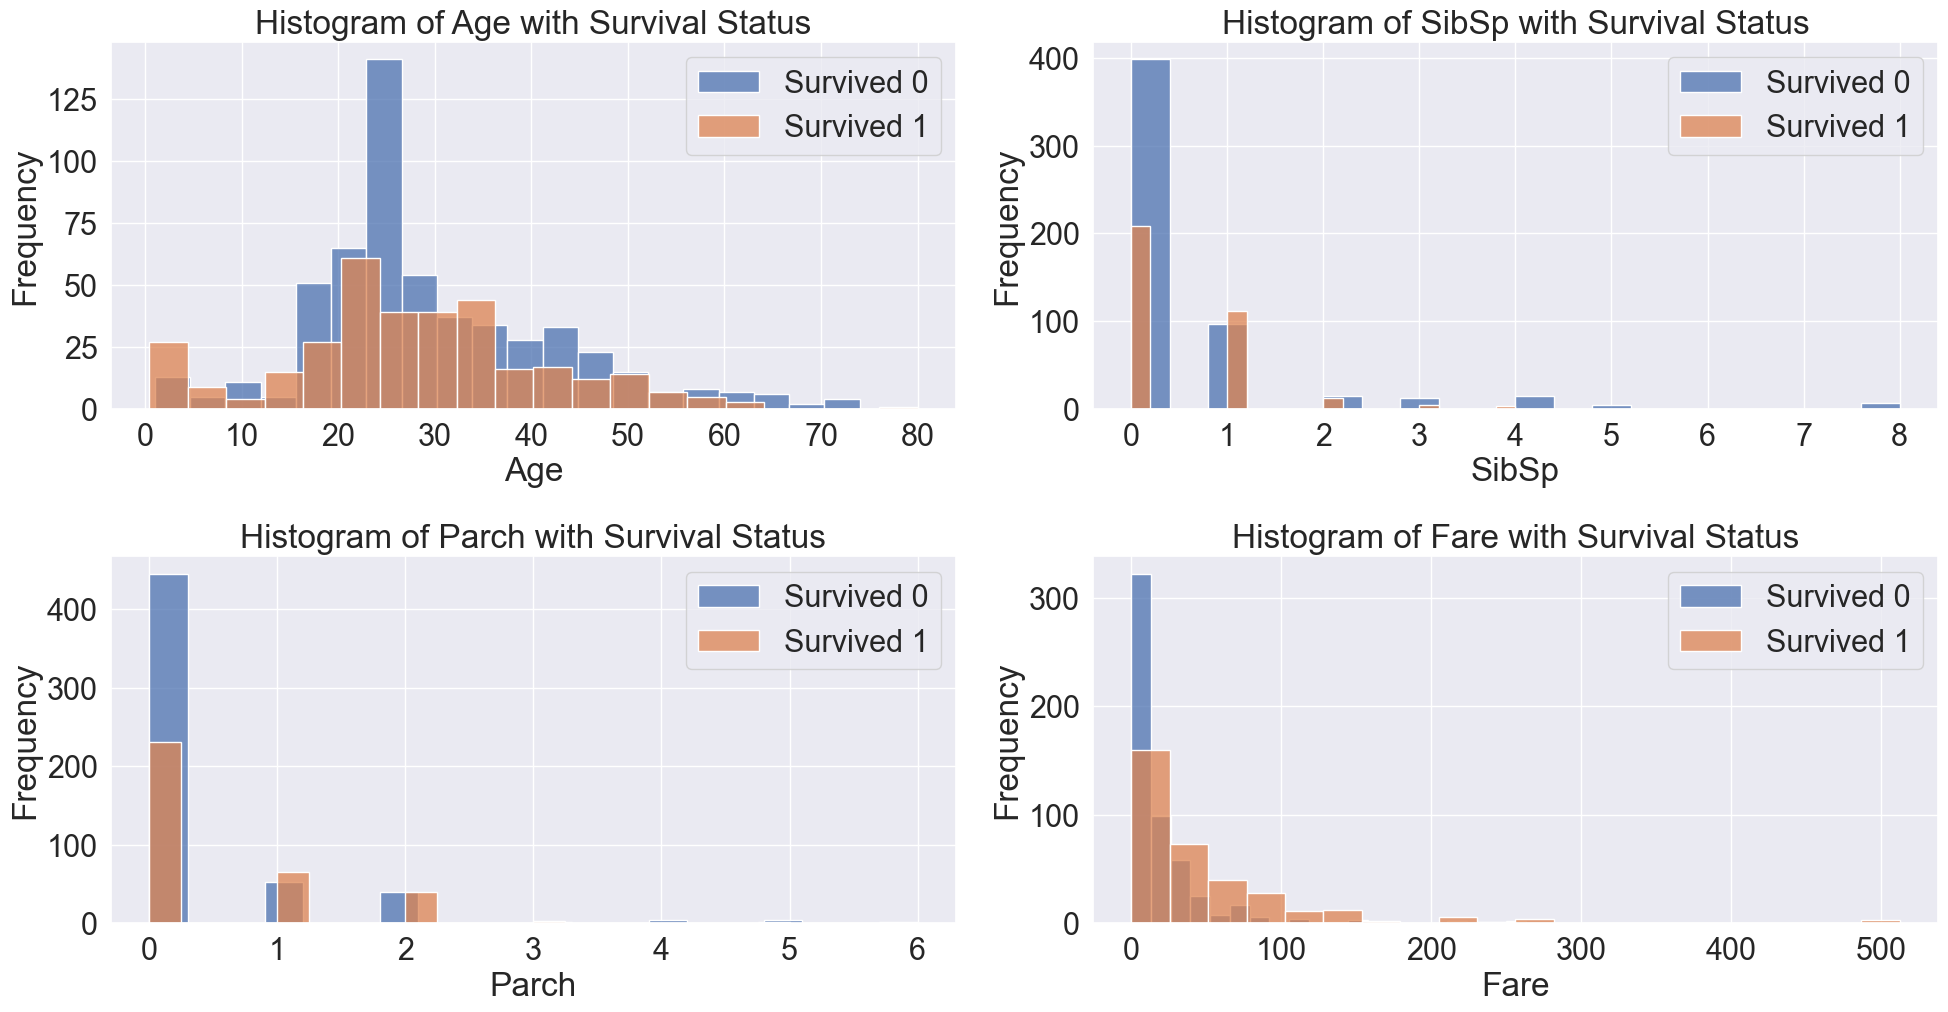

In [231]:
survived_labels = [0, 1]

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns.columns, 1):
    plt.subplot(3, 2, i)
    for survived_label in survived_labels:
        sns.histplot(data=df[Y == survived_label], x=col, bins=20,
                     label=f'Survived {survived_label}', kde=False)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} with Survival Status')
    plt.legend()
    plt.tight_layout()

plt.show()


#### Let us visualise the Correlation Matrix

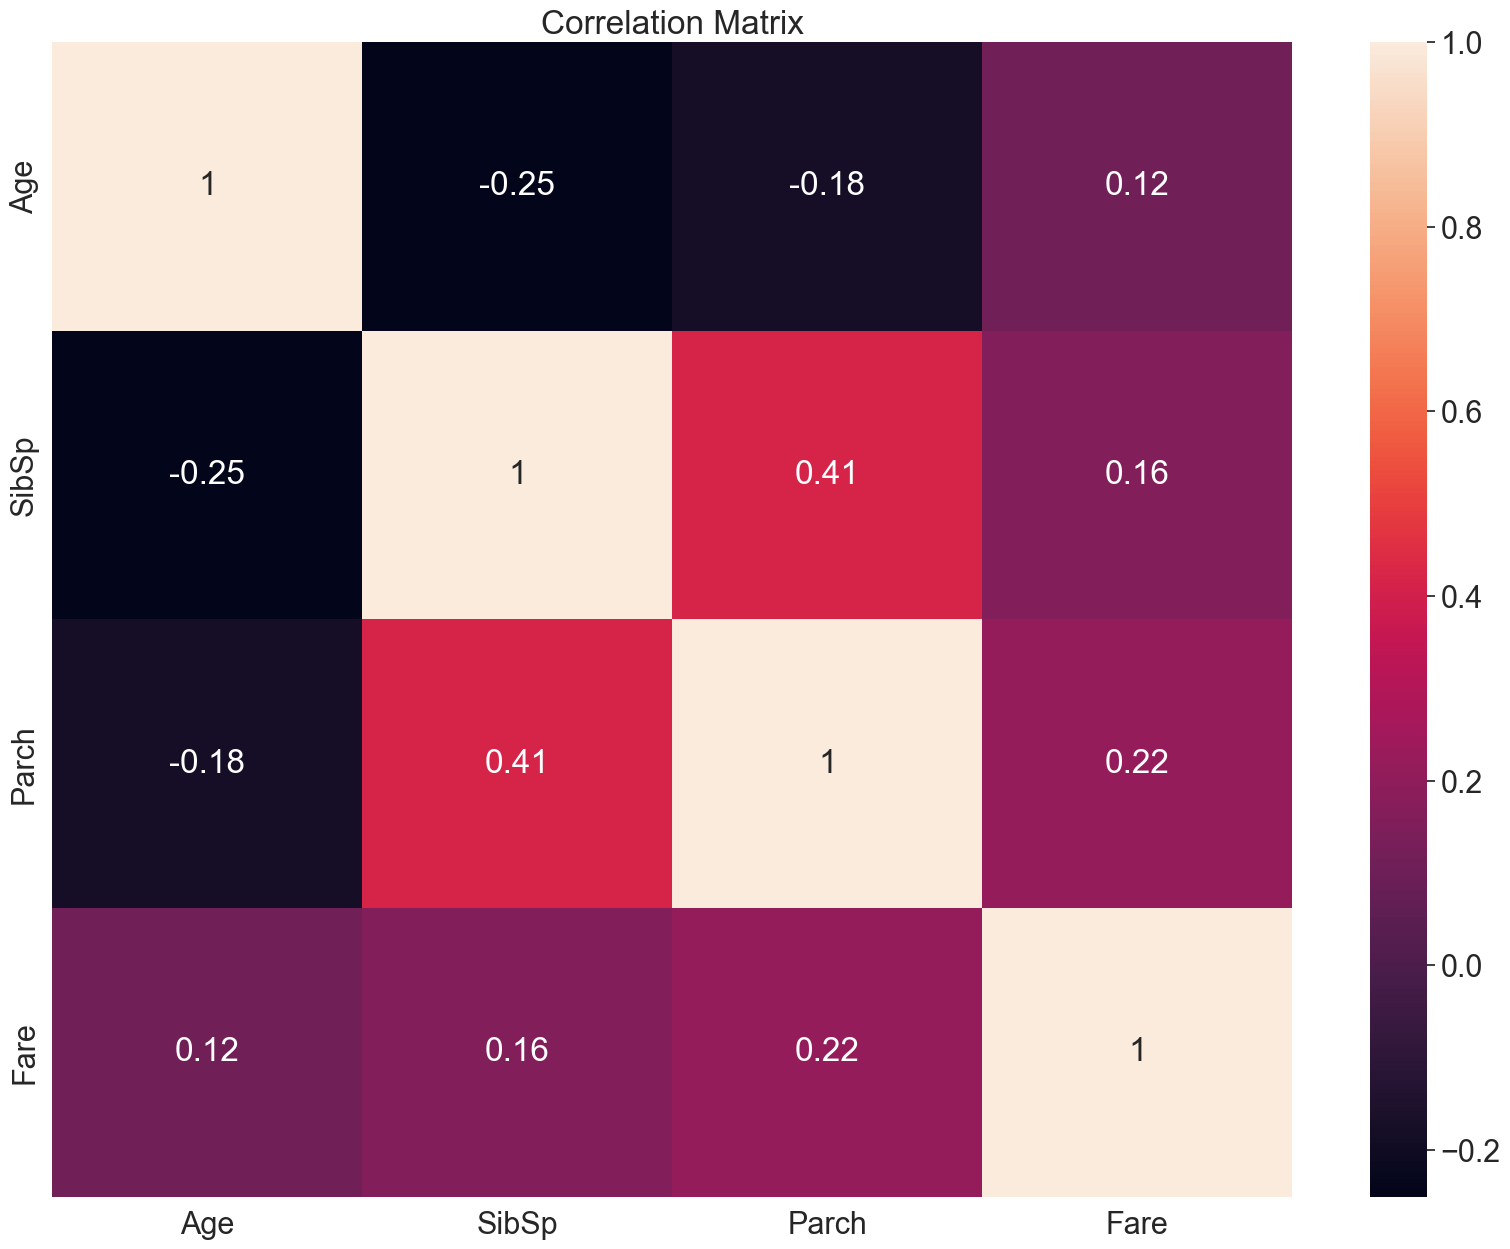

In [242]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


####  Let us do EDA on the dataset

##### 1. Let us plot **boxplot** for few attributes

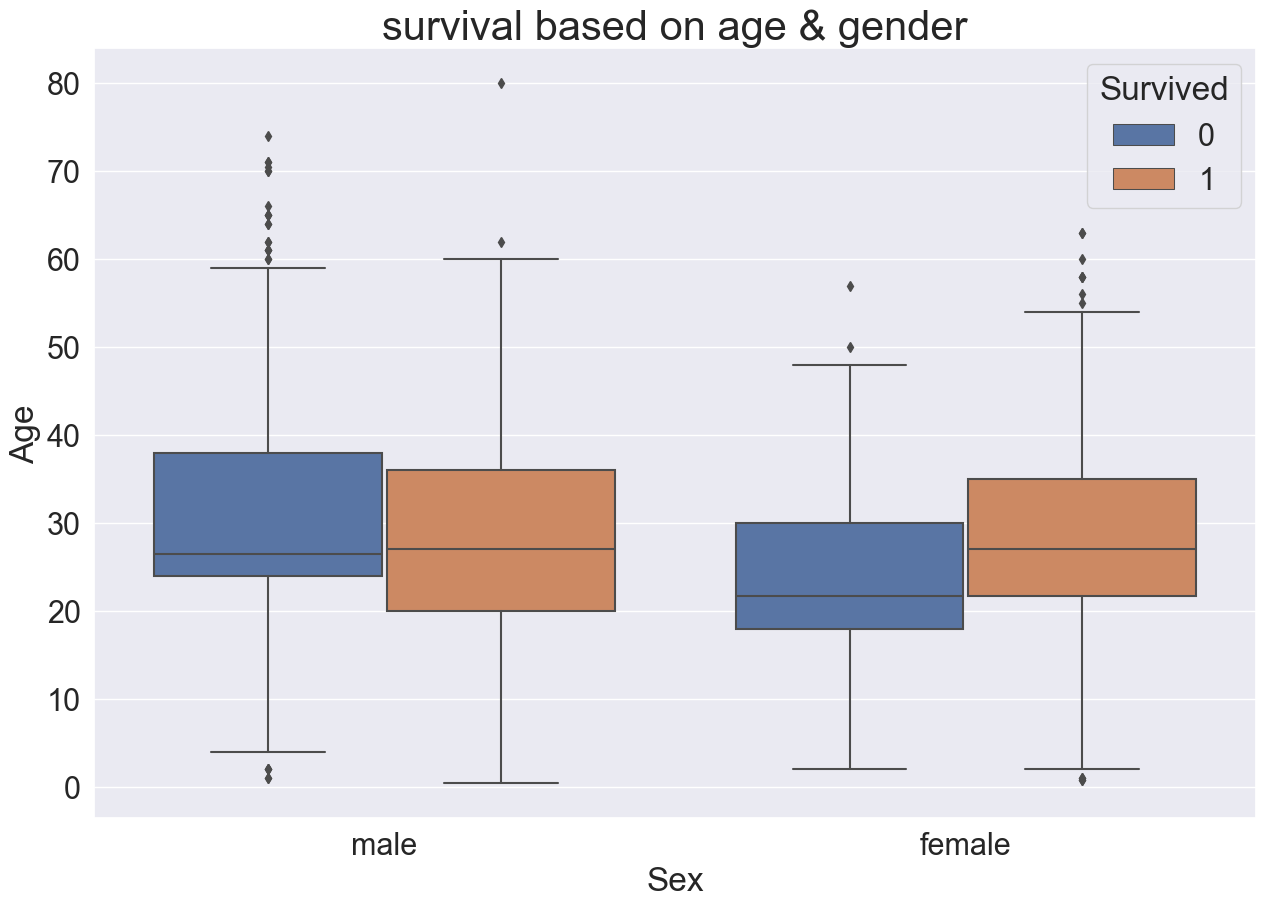

In [226]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=2)
sns.boxplot(data=df,x="Sex",y="Age",hue=Y)
plt.title("survival based on age & gender",fontsize=30)
plt.show()

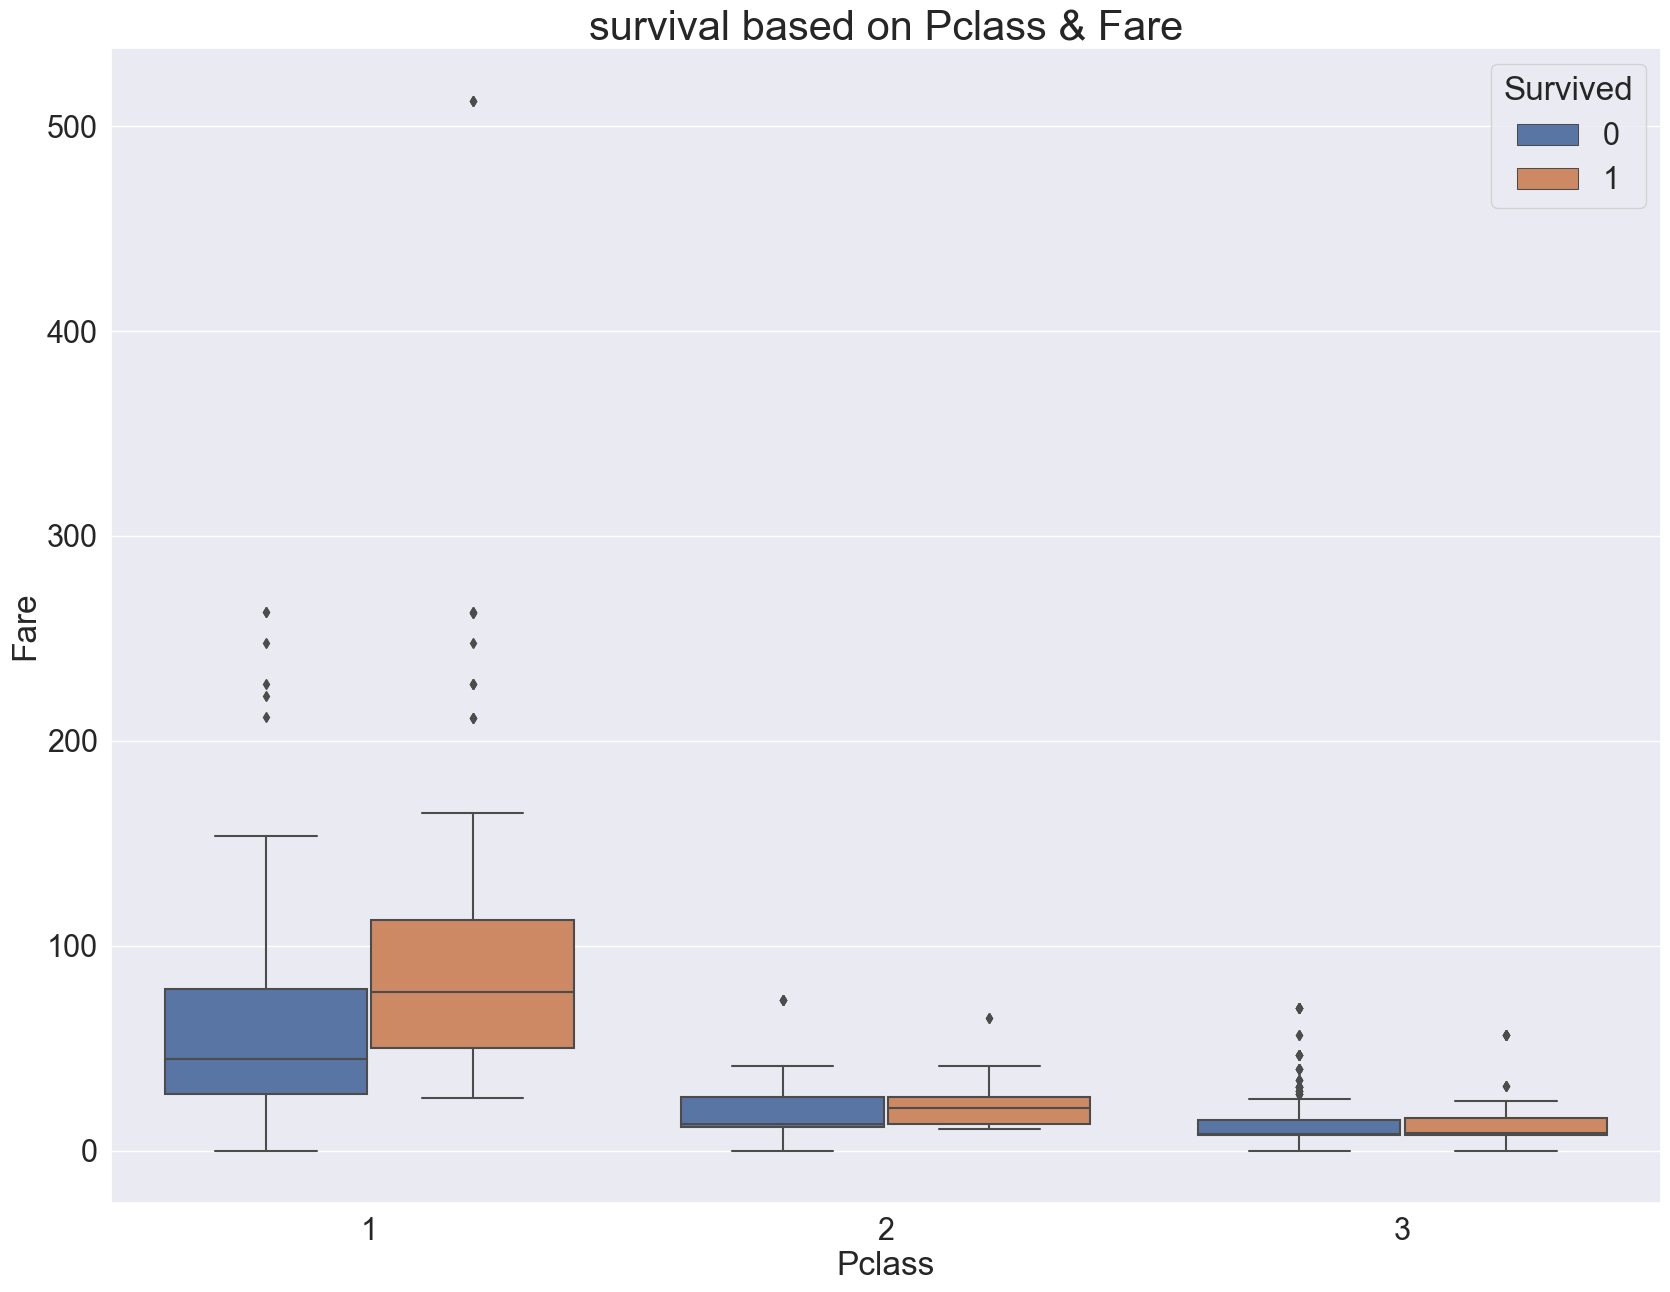

In [227]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.set(font_scale=2)
sns.boxplot(data=df,x="Pclass",y="Fare",hue=Y)
plt.title("survival based on Pclass & Fare",fontsize=30)
plt.show()

##### 2. Let us plot **scatter plot**

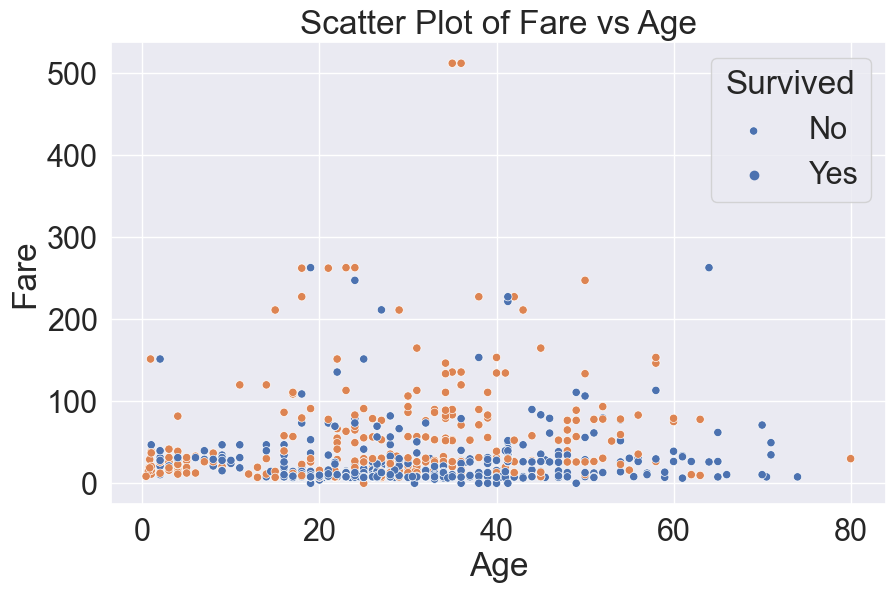

In [246]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue=Y)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Fare vs Age')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


<Figure size 1000x600 with 0 Axes>

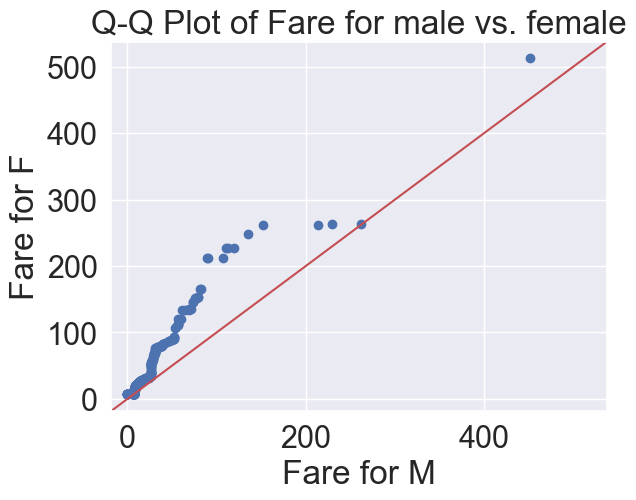

In [229]:
# Define male and female subsets
male_customers = df[df['Sex'] == 'male']
female_customers = df[df['Sex'] == 'female']
plt.figure(figsize=(10, 6))
# Q-Q plot for dependent monthly charges vs. non-dependent monthly charges
sm.qqplot_2samples(np.sort(male_customers['Fare']), np.sort(female_customers['Fare']),
                   line='45', xlabel='Fare for M', ylabel='Fare for F')
plt.title('Q-Q Plot of Fare for male vs. female')
plt.show()
